In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

%load_ext autoreload
%autoreload 2

In [24]:
def zernike(size=100, index=0, device="cpu"):
    x = torch.linspace(-1, 1, size).to(device)
    y = torch.linspace(-1, 1, size).to(device)
    xx, yy = torch.meshgrid(x, y)

    disk_mask = xx**2 + yy**2 < 1

    # From https://en.wikipedia.org/wiki/Zernike_polynomials#Zernike_polynomials
    # We use rho cos(phi) = xx, rho sin(phi) = yy
    # and trigonometric identities
    if index == 0:
        zernike = torch.ones_like(xx)
    elif index == 1:
        zernike = 2 * yy
    elif index == 2:
        zernike = 2 * xx
    elif index == 3:
        zernike = 2 * np.sqrt(6) * xx * yy  # oblique astigmatism
    elif index == 4:
        zernike = np.sqrt(3) * (2 * xx**2 + 2 * yy**2 - 1)  # defocus
    elif index == 5:
        zernike = np.sqrt(6) * (xx**2 - yy**2)  # vertical astigmatism
    elif index == 6:
        zernike = np.sqrt(8) * (3 * xx**2 * yy - yy**3)  # vertical trefoil
    elif index == 7:
        zernike = np.sqrt(8) * (3 * (xx**2 + yy**2) - 2) * yy  # vertical coma
    elif index == 8:
        zernike = np.sqrt(8) * (3 * (xx**2 + yy**2) - 2) * xx  # horizontal coma
    elif index == 9:
        zernike = np.sqrt(8) * (xx**3 - 3 * yy**2 * xx)  # oblique trefoil
    elif index == 10:
        zernike = np.sqrt(10) * (-4 * yy**3 * xx + 4 * xx**3 * y)
    elif index == 11:
        zernike = np.sqrt(10) * (-6 + 8 * xx**2 + 8 * yy**2) * xx * yy
    elif index == 12:
        zernike = np.sqrt(5) * (1 + (-6 + 6 * (xx**2 + yy**2)) * (xx**2 + yy**2))
    elif index == 13:
        zernike = np.sqrt(10) * (3 * yy**2 - 3 * xx**2 - 4 * yy**2 + 4 * xx**2)
    elif index == 14:
        zernike = np.sqrt(10) * (xx**4 + yy**2 - 6*xx**2*y**2)

    return disk_mask * zernike

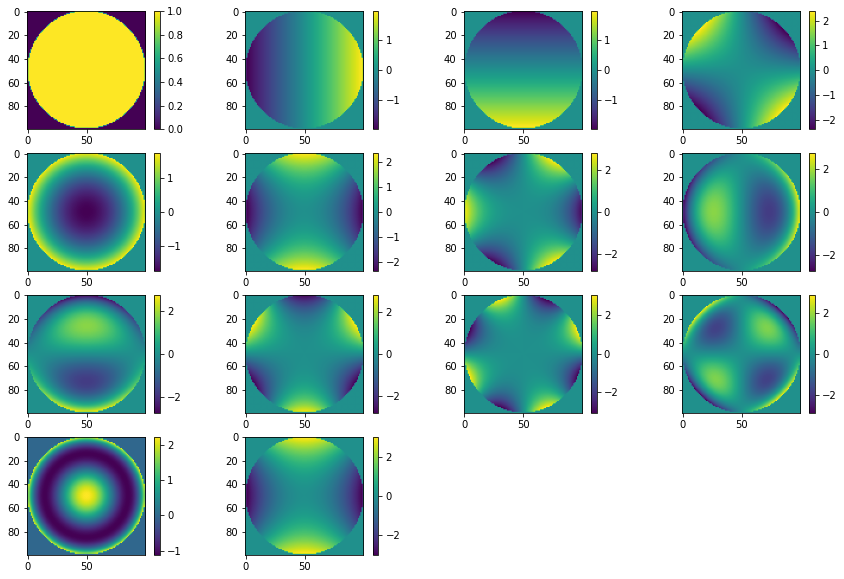

In [29]:
plt.figure(figsize=(15,10))
for i in range(14):
    plt.subplot(4, 4, i+1)
    test = zernike(index=i)
    plt.imshow(test)
    plt.colorbar()
plt.show()